# (84100) Farnocchia orbit determination test

In [1]:
import grss
prop = grss.prop
fit = grss.fit

In [2]:
import numpy as np
np.set_printoptions(precision=40, linewidth=np.inf)
import matplotlib.pyplot as plt

In [3]:
body_id = '84100'
init_sol, init_cov, nongrav_info = fit.get_sbdb_info(body_id)
body_radius = 0.0
de_kernel = 441
de_kernel_path = grss.utils.default_kernel_path(de_kernel)

In [4]:
add_gaia_obs = True
optical_obs_file = None
t_min_tdb = None
t_max_tdb = None
debias_hires = False
debias_lowres = True
deweight = True
eliminate = False
max_obs_per_night = 4
verbose = True
obs_array_optical, observer_codes_optical = fit.get_mpc_optical_obs_array(body_id, de_kernel_path, optical_obs_file, t_min_tdb, t_max_tdb, debias_hires, debias_lowres, deweight, eliminate, max_obs_per_night, verbose)
obs_array_radar, observer_codes_radar = fit.get_radar_obs_array(body_id, t_min_tdb, t_max_tdb, verbose)
if add_gaia_obs:
    gaia_dr = 'gaiafpr'
    obs_array_gaia, observer_codes_gaia = fit.get_gaia_optical_obs_array(body_id, de_kernel_path, t_min_tdb, t_max_tdb, gaia_dr, verbose)
    obs_array_optical = np.vstack((obs_array_optical, obs_array_gaia))
    observer_codes_optical = observer_codes_optical + observer_codes_gaia

Skipped 0 observations 
	 0 of which were non-geocentric occultations, 
	 0 were either roving or radar observations (radar is handled separately), 
	 0 of which were outside the specified time range.
No debiasing needed for 505 observations. Debiased 438 observations. No biasing information for 0 observations.
Applied default weight of 1 arcsec to 38 CCD observations
Deweighted 208 observations as part of deweighting scheme.
Found 191 observations from gaiafpr
	 Added 191 of those observations.


In [5]:
n_iter_max = 10
fit_sim = fit.FitSimulation(init_sol, init_cov, obs_array_optical, observer_codes_optical, obs_array_radar, observer_codes_radar, n_iter_max=n_iter_max, de_kernel=de_kernel, de_kernel_path=de_kernel_path, radius=body_radius, nongrav_info=nongrav_info)

In [6]:
fit_sim.filter_lsq()

Iteration		Unweighted RMS		Weighted RMS 		Chi-squared		Reduced Chi-squared
1			 0.402			 0.611			 617.518			 0.273
2			 0.404			 0.598			 619.424			 0.274
3			 0.404			 0.598			 619.424			 0.274
Converged without rejecting outliers. Starting outlier rejection now...
4			 0.374			 0.570			 541.165			 0.240
5			 0.374			 0.570			 541.321			 0.240
Converged after rejecting outliers. Rejected 5 out of 1134 optical observations.


In [7]:
fit_sim.print_summary()

Summary of the orbit fit calculations at iteration 5 (of 5):
RMS unweighted: 0.3737289062138422
RMS weighted: 0.5700844324146948
chi-squared: 541.3210191378921
reduced chi-squared: 0.2403734543241084
square root of reduced chi-squared: 0.49027895562027585
--------------------------------------------------------------
Solution Time: MJD 58042.000 TDB = 2017-10-16 00:00:00.000 TDB
Solution Observation Arc: 10342.85 days
--------------------------------------------------------------
Fitted Variable		Initial Value			Uncertainty			Fitted Value 			Uncertainty			Change				Change (sigma)
e			2.02839420821e-01		1.41072497409e-09 		2.02839418188e-01		1.41452945833e-09 		-2.63307539661e-09		-1.866
q			2.17602309556e+00		5.02213641990e-09 		2.17602308754e+00		5.00434425265e-09 		-8.01885535751e-09		-1.597
tp			5.74182713236e+04		7.41859215578e-06 		5.74182712893e+04		7.31070501446e-06 		-3.43584688380e-05		-4.631
om			1.52357305306e+02		1.14596100392e-06 		1.52357306613e+02		1.13528216146e-06 		+1

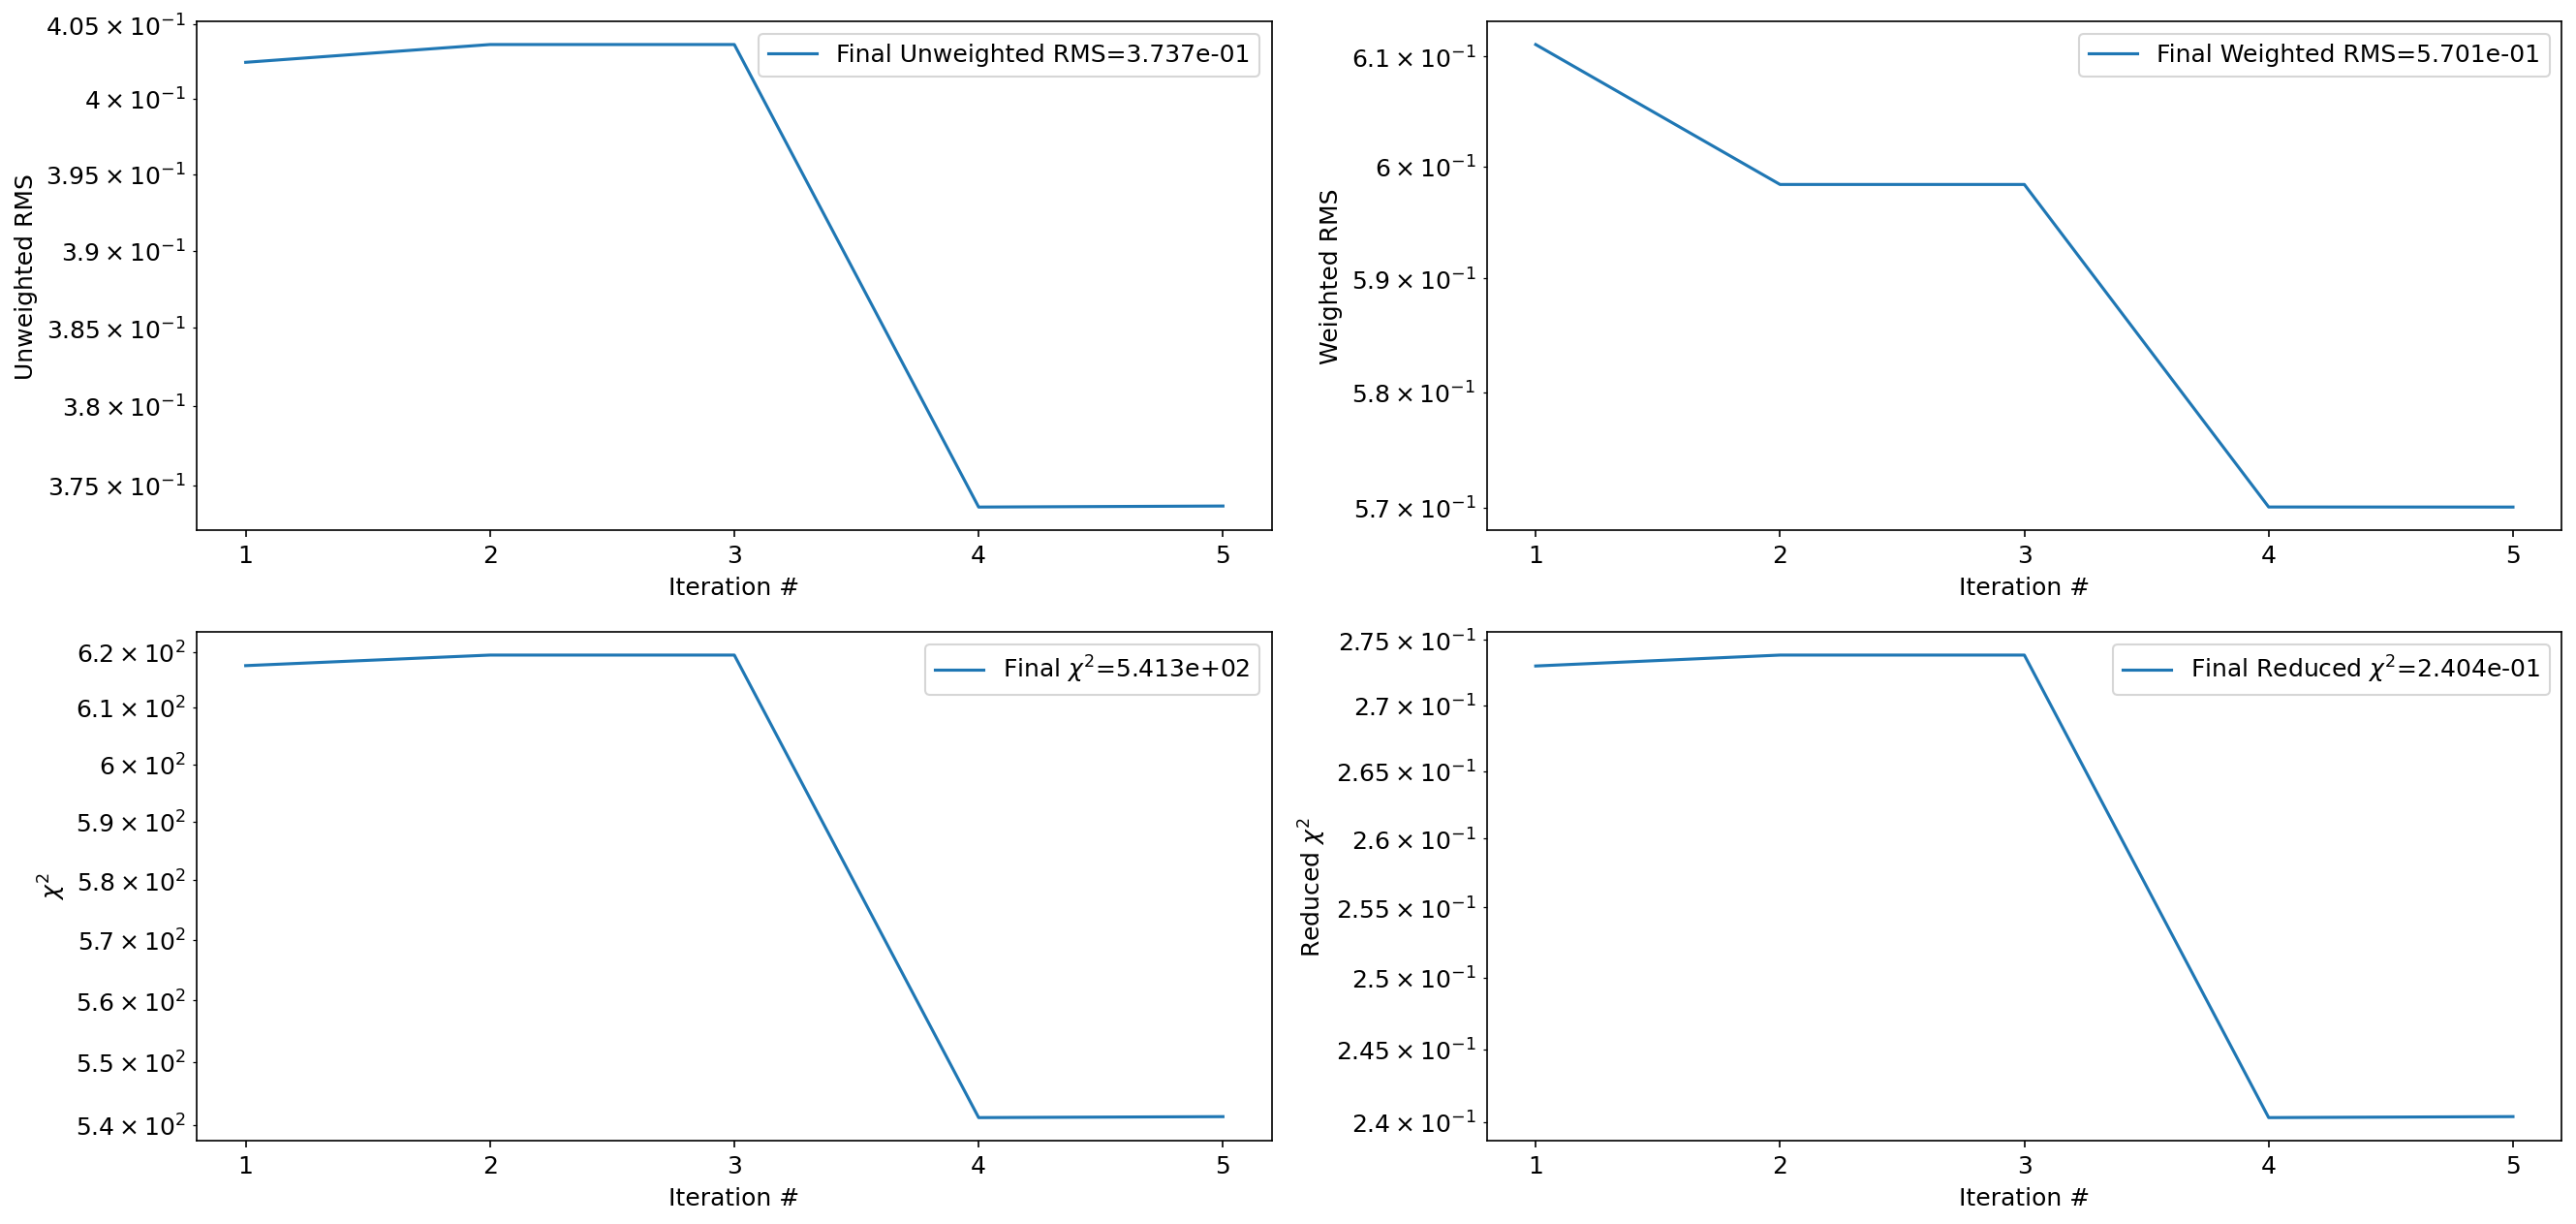

In [8]:
fit_sim.plot_summary(auto_close=True)

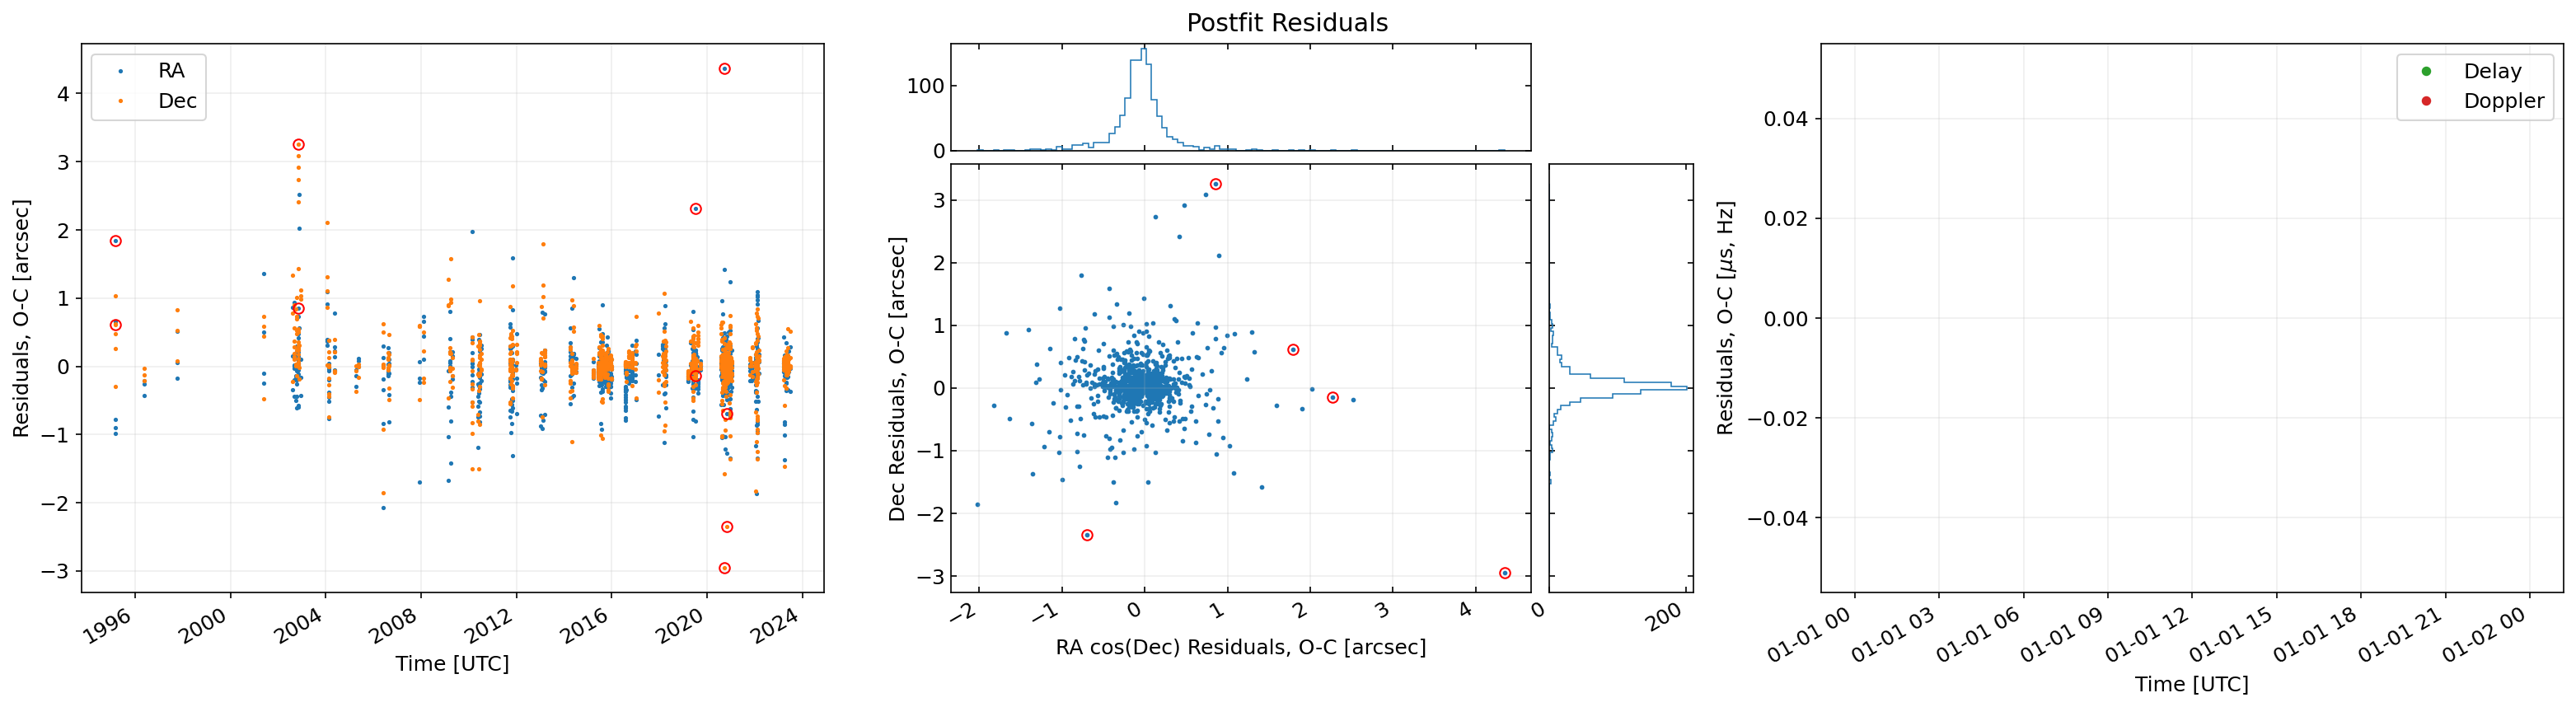

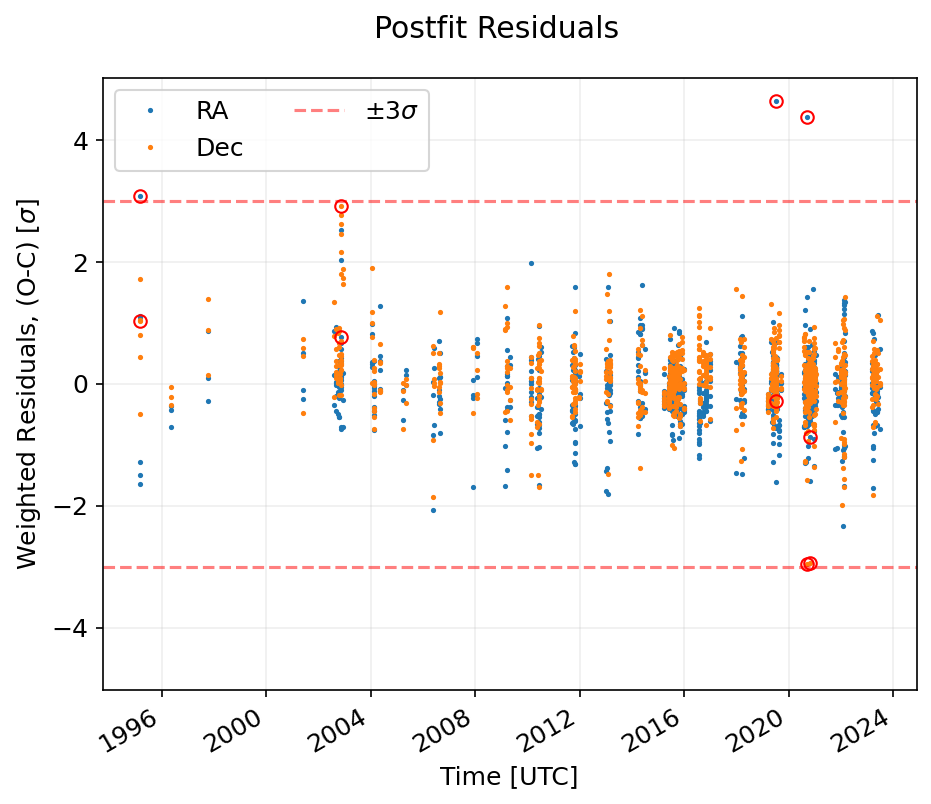

In [9]:
fit_sim.iters[-1].plot_iteration_summary(title='Postfit Residuals', auto_close=True)

In [10]:
mean_0 = np.array(list(init_sol.values())[1:])
cov_0 = init_cov
mean_f = np.array(list(fit_sim.x_nom.values()))
cov_f = fit_sim.covariance

maha_dist_f, maha_dist_0, bhattacharya, bhatt_coeff = fit.get_similarity_stats(mean_0, cov_0, mean_f, cov_f)
print(f'Mahalonobis distance between JPL and GRSS solution: {maha_dist_f:0.2f}')
print(f'Mahalonobis distance between GRSS and JPL solution: {maha_dist_0:0.2f}')
print(f'Bhattacharya distance between JPL and GRSS solution: {bhattacharya:0.4f}')
print(f'Bhattacharya coefficient between JPL and GRSS solution: {bhatt_coeff:0.4f}')

Mahalonobis distance between JPL and GRSS solution: 5.92
Mahalonobis distance between GRSS and JPL solution: 5.99
Bhattacharya distance between JPL and GRSS solution: 0.0002
Bhattacharya coefficient between JPL and GRSS solution: 0.9998


In [11]:
assert maha_dist_f < 5.0
assert maha_dist_0 < 5.0
assert bhattacharya < 0.10
assert bhatt_coeff > 0.90

AssertionError: 